# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

1)    
$X \in M_{n, 1}$  
$Y \in M_{n, 1}$  
$\theta \in R^1$  
$\hat{\theta} = (X^TX)^{-1}X^TY = (\sum\limits_{i = 1}^{n}(x_i^2))^{-1}\sum\limits_{i = 1}^{n}(x_iy_i) = \frac{\sum\limits_{i = 1}^{n}(x_iy_i)}{\sum\limits_{i = 1}^{n}(x_i^2)} $  
Подставляя $y_i = {\theta}x + \epsilon_i$  
$\hat{\theta} = \theta + \frac{\sum\limits_{i=1}^{n}x_i \epsilon_i}{\sum\limits_{i = 1}^{n}(x_i^2)}$

2)  
$\newcommand{\rth}{\hat{\theta}}$
GD:  $\rth_{t+1} = \rth_t - \eta \sum\limits_{i = 1}^{n}x_i(x_i\rth_t - y_i)$ - сразу из доказанного на лекции  
SGD:  $\rth_{t+1} = \rth_t - \eta \frac{n}{k}\sum\limits_{i \in I}x_i(x_i \rth_t - y_i) = \rth_t - \eta \frac{n}{k}\sum\limits_{i \in I}x_i(x_i\rth_{t} - y_i)$,    $I = \{\xi_1, \xi_2, ..., \xi_k\}, \forall j$ $\xi_j \sim U\{1, 2, ..., n\}$, k - параметр, т.е. каждая координата $I$ выбирается случайно равновероятно среди n на каждой итерации  

3)  
$E\rth = \frac{\sum\limits_{i = 1}^{n}(E(x_iy_i))}{\sum\limits_{i = 1}^{n}(x_i^2)} = 
\frac{\sum\limits_{i = 1}^{n}(x_iE(y_i))}{\sum\limits_{i = 1}^{n}(x_i^2)} = \frac{\sum\limits_{i = 1}^{n}(x_iE(\theta x_i + \epsilon_i))}{\sum\limits_{i = 1}^{n}(x_i^2)} = 
\frac{\sum\limits_{i = 1}^{n}(x_i(\theta x_i + E\epsilon_i))}{\sum\limits_{i = 1}^{n}(x_i^2)}  = 
\frac{\sum\limits_{i = 1}^{n}(x_i(\theta x_i))}{\sum\limits_{i = 1}^{n}(x_i^2)} =
\theta \frac{\sum\limits_{i = 1}^{n}(x_i^2)}{\sum\limits_{i = 1}^{n}(x_i^2)} =
\theta$   
$E\hat{y}(x) = E(\rth x) = xE(\rth) = \theta x = y(x)$

4)  
$D\rth = D(\theta + \frac{\sum\limits_{i=1}^{n}x_i \epsilon_i}{\sum\limits_{i = 1}^{n}(x_i^2)}) = D(\frac{\sum\limits_{i=1}^{n}x_i \epsilon_i}{\sum\limits_{i = 1}^{n}(x_i^2)}) = 
\sum\limits_{i = 1}^{n}(x_i^2))^{-2} D(\sum\limits_{i=1}^{n}x_i \epsilon_i) = \sum\limits_{i = 1}^{n}(x_i^2))^{-2} \sum\limits_{i=1}^{n}x_i^2 D(\epsilon_i) = (\sum\limits_{i=1}^{n}x_i^2)^{-1} \sigma^2$ - тут использовалось, что если $\epsilon_1, ..., \epsilon_t$-независимы, то и с коэффициентами - любыми они будут независимы $\Rightarrow$ дисперсия суммы - сумма дисперсий 
$D\hat{y}(x) = D(\rth x) = x^2D\rth = \frac{x^2}{\sum\limits_{i=1}^{n}x_i^2}\sigma^2$

5)  
Не все нули при существовании $x_i \neq 0$  
Если матрица $X^TX$ близка к вырожденной, то если проводить аналогию с частным случаем $d = 1$, то будет очень большая Дисперсия или по крайней мере будет непредсказуемо себя вести и не может идти речь о точности.  
Учитывая, что $det(X^TX) = det(X)^2$, то $det((X^TX)^{-1}) = \frac{1}{det(X)^2}$  
При близких к вырожденной $X^TX$ оценки для $\rth$ могут быть очень плохими, при смене параметров на небольшую величину могут сильно меняться


---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

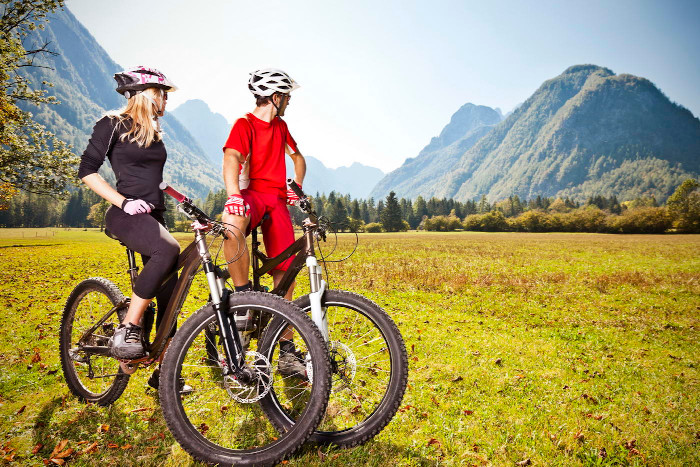

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
#data = pd.read_csv("Bike-Sharing-Dataset/hour.csv")

In [5]:
data = pd.read_csv("Bike-Sharing-Dataset/day.csv")

In [6]:
data = data[
    [
        "season",
        "mnth",
        "holiday",
        "weekday",
        "workingday",
        "weathersit",
        "temp",
        "atemp",
        "hum",
        "windspeed",
        "cnt",
    ]
]

Делим на тестовые и тренировочные

In [7]:
train, test = train_test_split(data, test_size=0.2, shuffle=True)
print (train.shape, test.shape)

(584, 11) (147, 11)


In [8]:
train.head()

season  mnth  holiday  weekday  workingday  weathersit      temp  \
535       2     6        0        2           1           1  0.688333   
174       3     6        0        5           1           1  0.724167   
703       4    12        0        2           1           1  0.475833   
690       4    11        0        3           1           1  0.353333   
363       1    12        0        5           1           1  0.311667   

        atemp       hum  windspeed   cnt  
535  0.654692  0.690000   0.148017  6825  
174  0.656583  0.573333   0.222025  4991  
703  0.469054  0.733750   0.174129  6606  
690  0.364892  0.613750   0.103246  5146  
363  0.318812  0.636667   0.134337  2999

In [9]:
categorial_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth']
target_feature = 'cnt'

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

Посмотрим на зависимость atemp от temp:

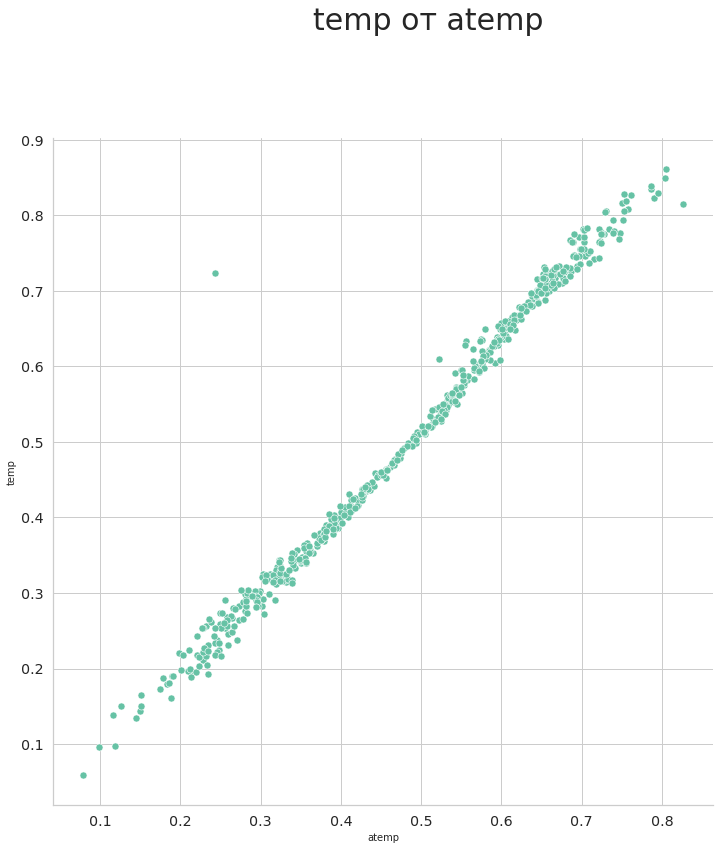

In [10]:
g = sns.jointplot(data=train, x="atemp", y="temp", height=12, s=50)
plt.suptitle("temp от atemp", fontsize=30)
g.ax_marg_x.remove()
g.ax_marg_y.remove()

##### Краткий вывод:
- температура и кажущаяся температура очень близки и зависимы линейно скорее всего как y = x

В дальнейшем будем рассматривать только параметр atemp чтобы было менее громоздко

Сначала расмотрим все графики для того чтобы понять что анализировать в дальнейшем

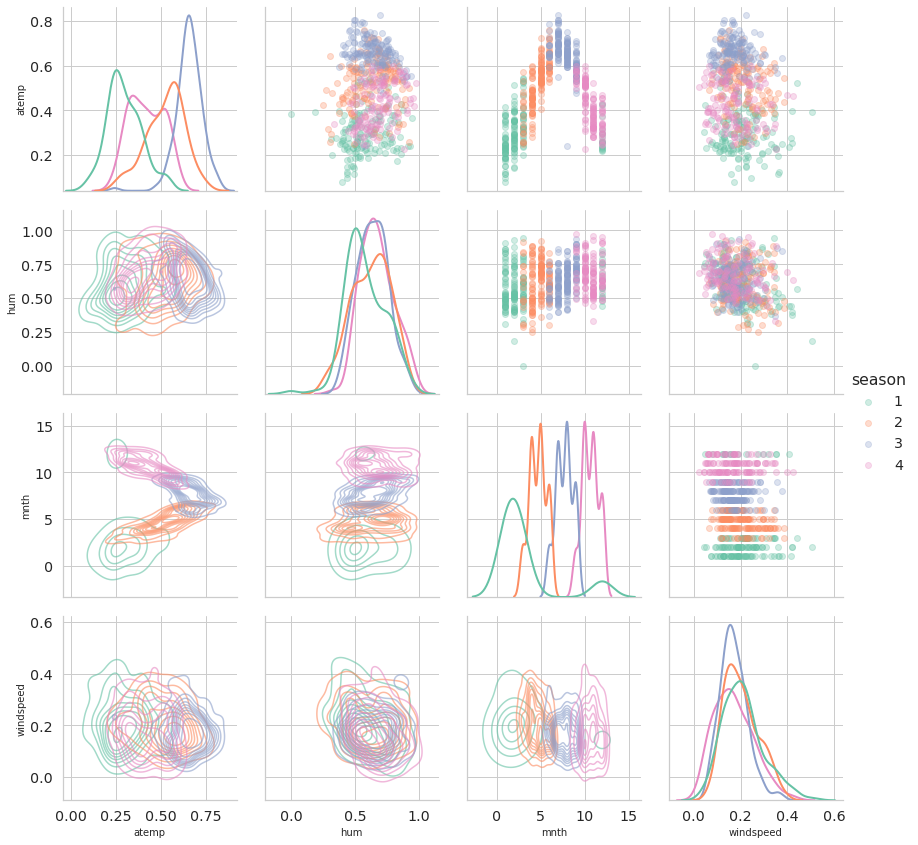

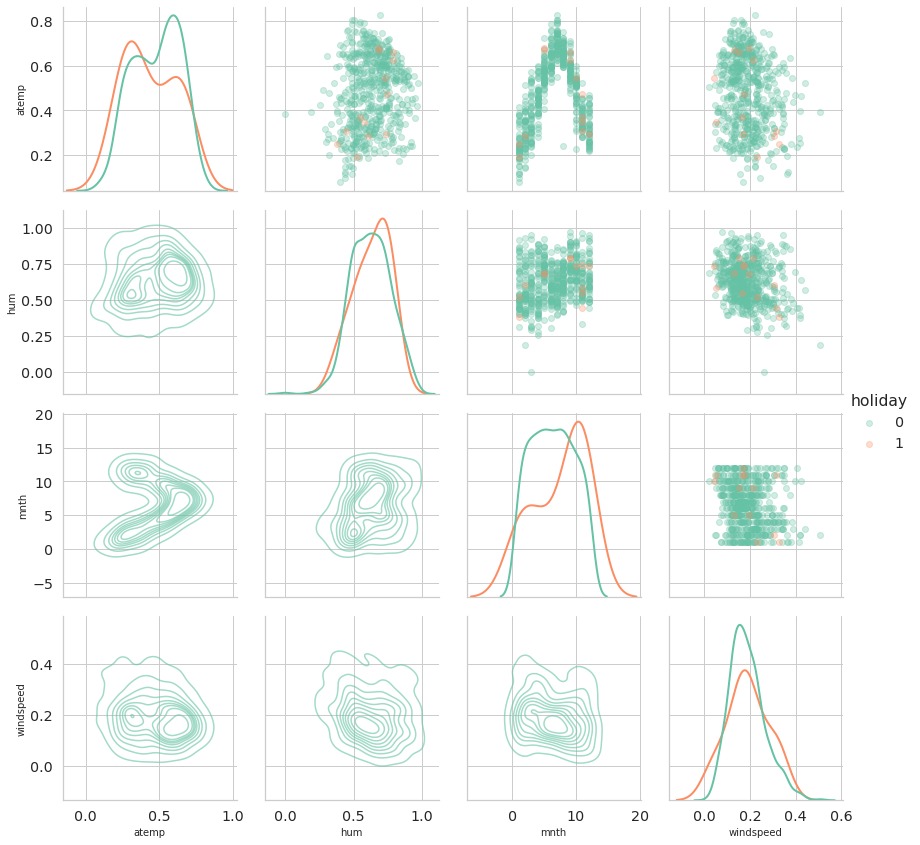

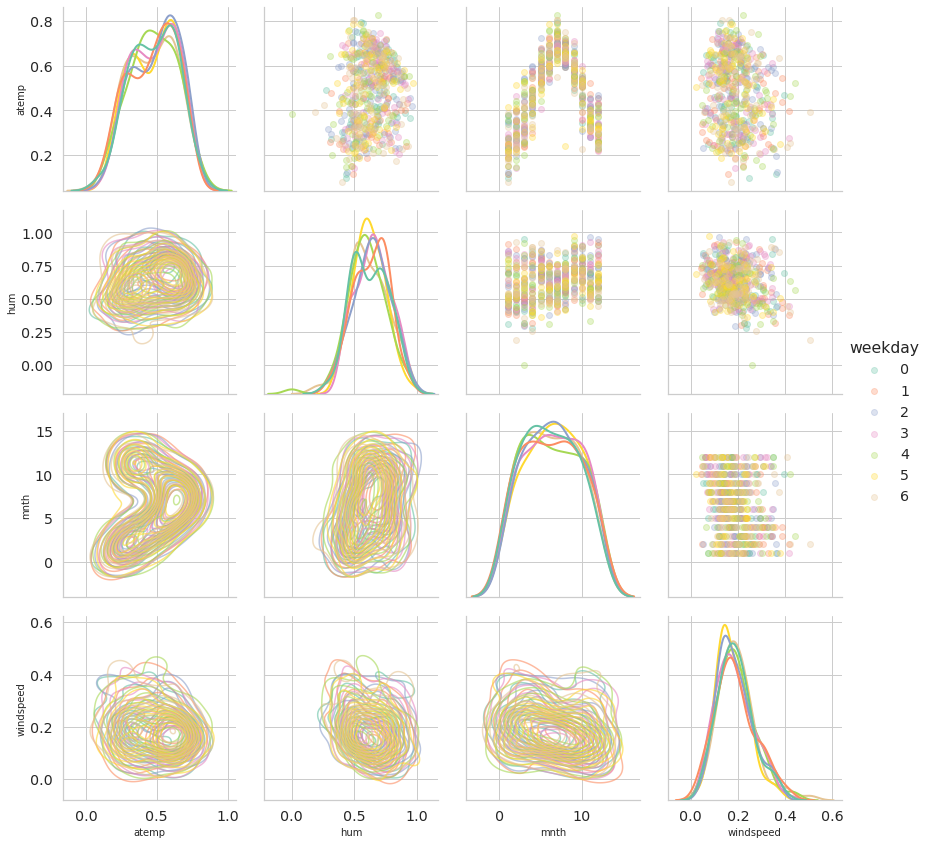

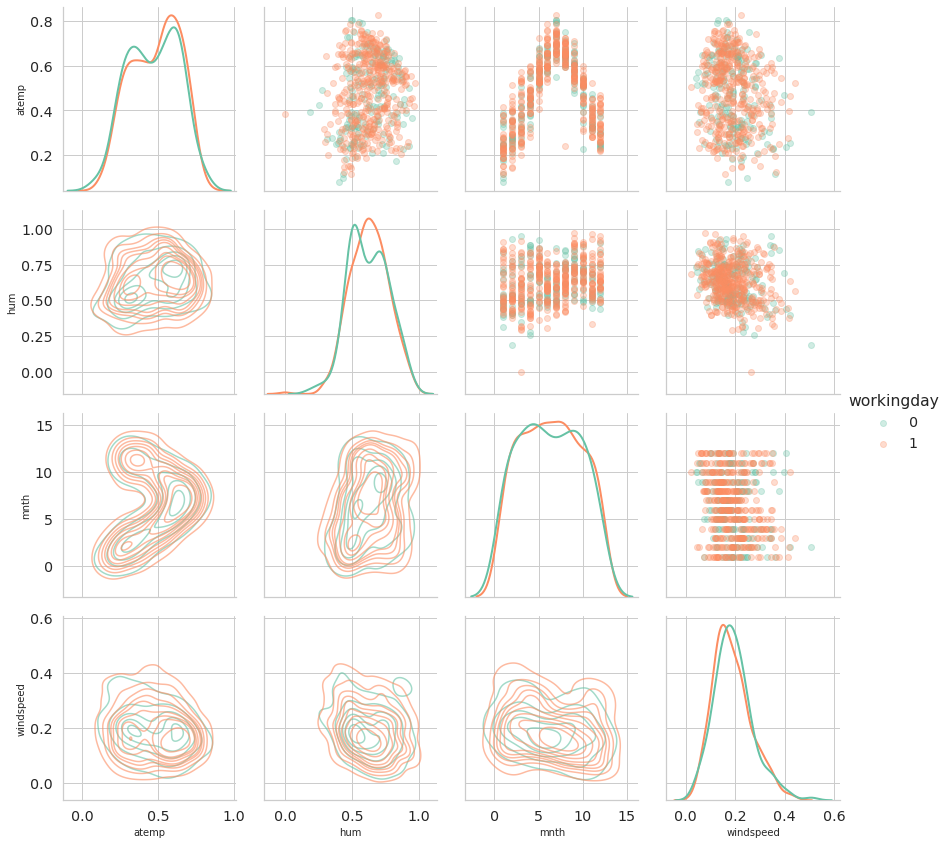

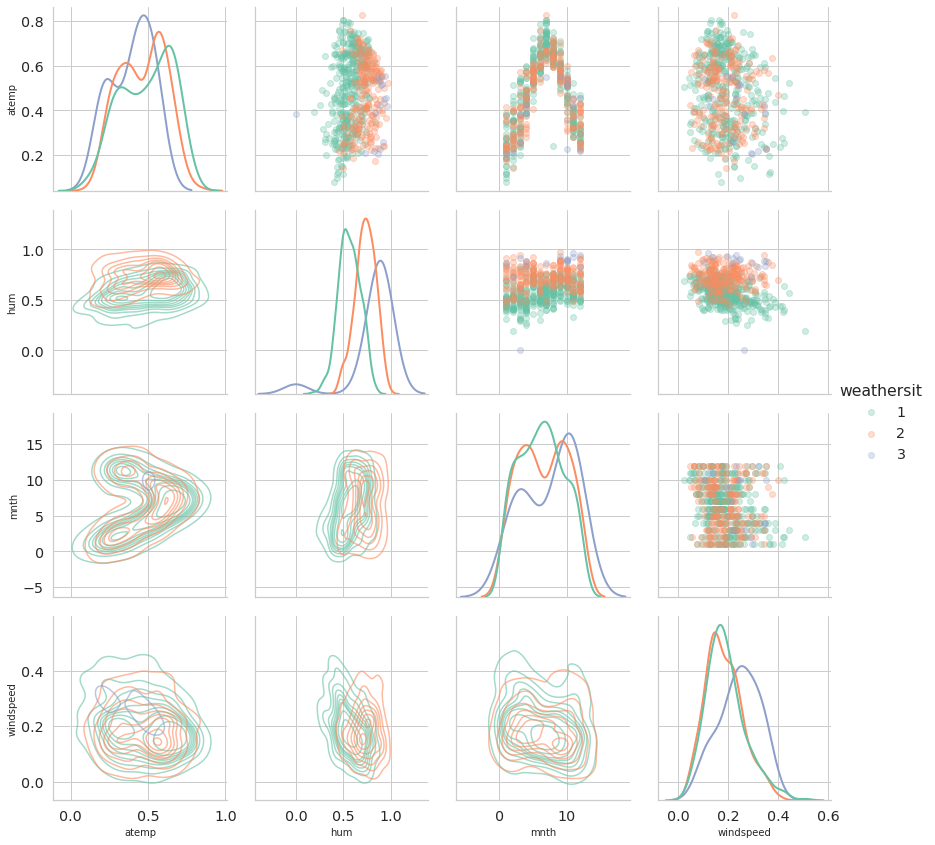

In [11]:
for hue in categorial_features:
    g = sns.PairGrid(
        train[["atemp", "hum", "mnth", "windspeed", hue]],
        hue=hue,
        diag_sharey=False,
        height=3,
        palette="Set2",
    )

    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(
        sns.kdeplot, lw=2, alpha=1, common_norm=False
    )
    g.add_legend()

##### Выволд из вспомогательных графиков:  
1) Явную зависимость видно между:
- температурой и кажущейся температурой - линейная
- сезоном(и месяцем аналогично) и температурой 
- Погодой (от хорошей до плохой) и параметрами влажности скорости ветра  


2) Зависимости остальных параметров такой явной нету (не видно)

#### Теперь построим графики от целевого признака:
- будем округлят и группировать признаки по среднему cnt чтобы было понятнее
- сначала будем строить графики с некоторыми категориальными признаками чтобы не выявлять лишних зависимостей
- рассматриваем категориалные только те, что на графиках выше показывали зависимость(например hum от weathersit и т.п.)

In [12]:
def hue_plots(param: str, categories):
    first = True
    for hue in categories:

        g = sns.PairGrid(
            train[["cnt", param, hue]],
            hue=hue,
            diag_sharey=False,
            height=3,
            palette="Set2",
        )
        if first:
            plt.suptitle(f"Зависимость от {param}", fontsize=25)
            first = False
        g.map_lower(sns.kdeplot, alpha=0.6)
        g.map_upper(plt.scatter, alpha=0.5, s=50)
        g.map_diag(
            sns.kdeplot, lw=2, alpha=1, common_norm=False
        )  # каждая плотность по отдельности должна давать 1 при интегрировании
        g.add_legend()


def groupped_filter_jointplot(param, hue, filter_values, precision=2):
    copy = train[train[hue].isin(filter_values)].copy()
    copy[param] = np.round(copy[param], precision)
    copy = copy[[param, "cnt"]].groupby(by=param, as_index=False).mean()
    sns.jointplot(data=copy, x=param, y="cnt", height=12, s=400)
    plt.suptitle(f"Зависимость cnt от {param}", fontsize=35)

Функция рисует графики зависимости target от параметра с учетом категорий и с группировкой

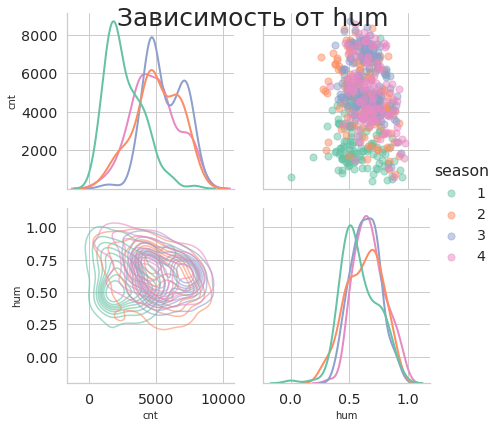

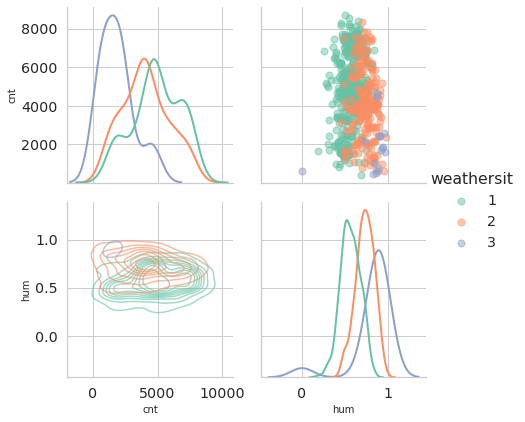

In [13]:
hue_plots('hum', ['season', 'weathersit'])

Теперь учитывая что плохая погода сама по себе означает уменьшение cnt рассмотрим зависимость cnt от hum без учета плохой погоды

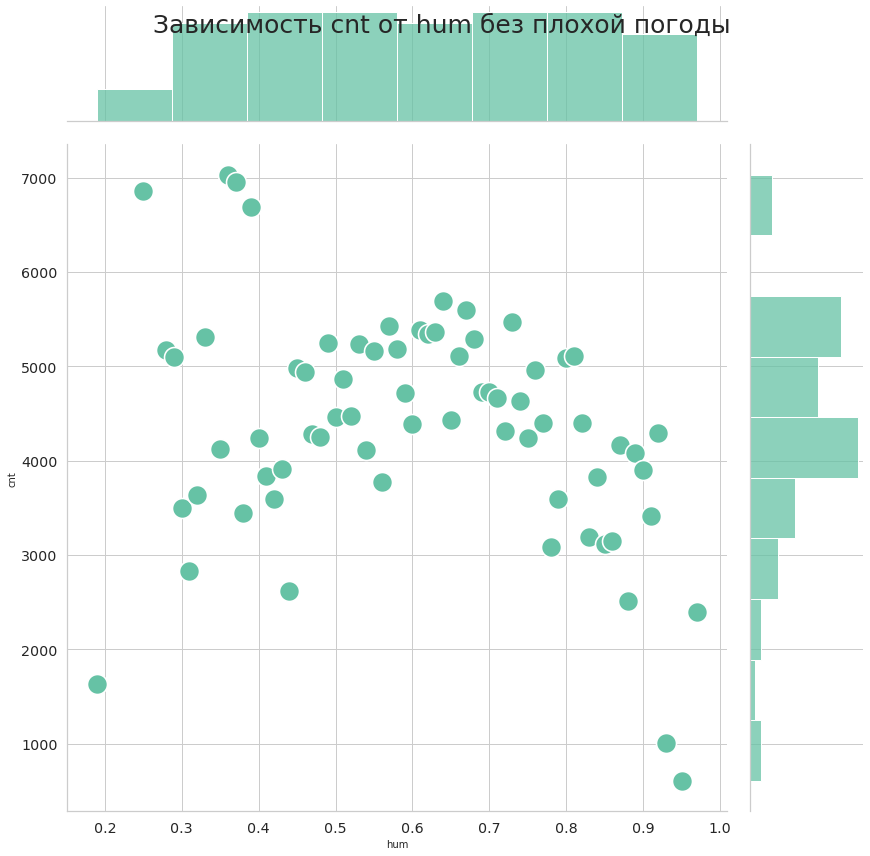

In [14]:
groupped_filter_jointplot('hum', 'weathersit', [1, 2])
plt.suptitle("Зависимость cnt от hum без плохой погоды", fontsize = 25)
plt.show()

##### Краткие выводы:
- если очень большая влажность то скорее всего погода плохая и cnt мал
- рассматривая cnt от hum усредненный без учета погоды 3(плохой) видная зависимость - растет от 0 до 0.6 и дальше убывает

In [15]:
def param_joint_plot(param: str):
    flag = True
    x = train[target_feature]
    y = train[param]
    xlim = {min(train[param]) - 0.1, 0.1 + max(train[param])}
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        graph = sns.jointplot(
            data=train,
            y=target_feature,
            x=param,
            xlim=xlim,
            s=150,
            alpha=0.6,
            color="xkcd:azure",
            height=10,
            palette="Set1",
        )
        graph.fig.suptitle(f"Зависимость от {param}", fontsize=30)

Рассмотрим зависимость от температуры по ощущениям

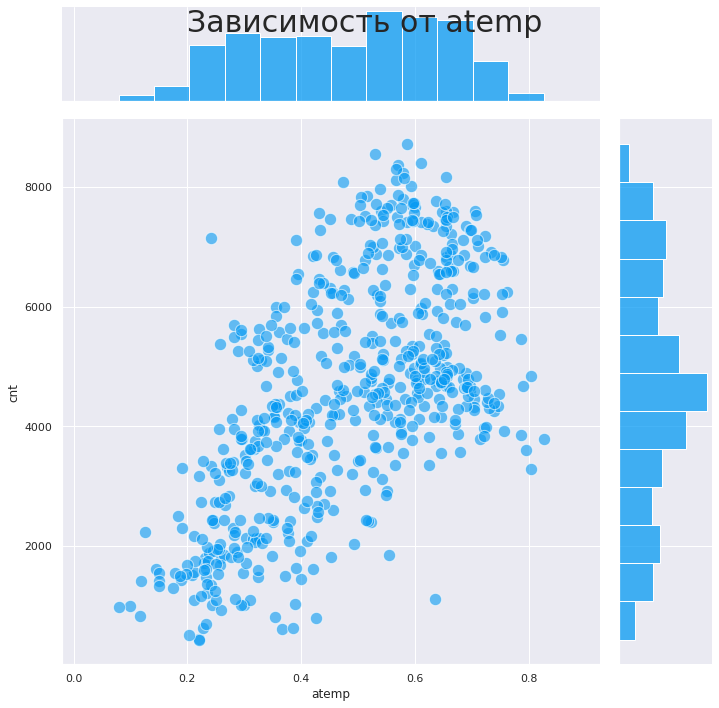

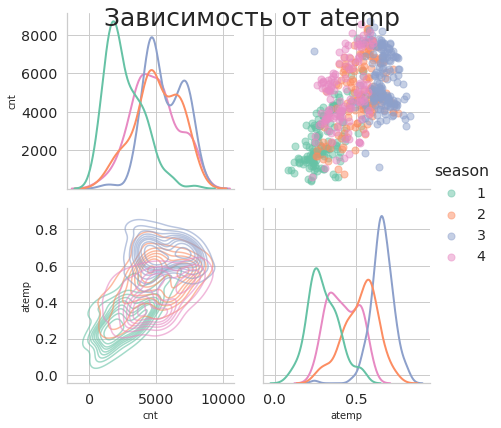

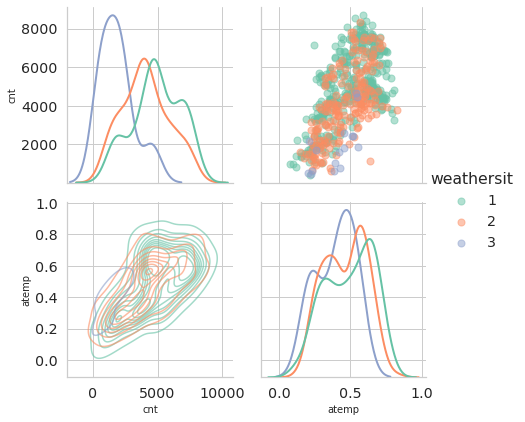

In [16]:
param_joint_plot('atemp')
hue_plots('atemp', ['season', 'weathersit'])

Теперь рассмоитрим зависимость от температуры опять же без учета плохой погоды

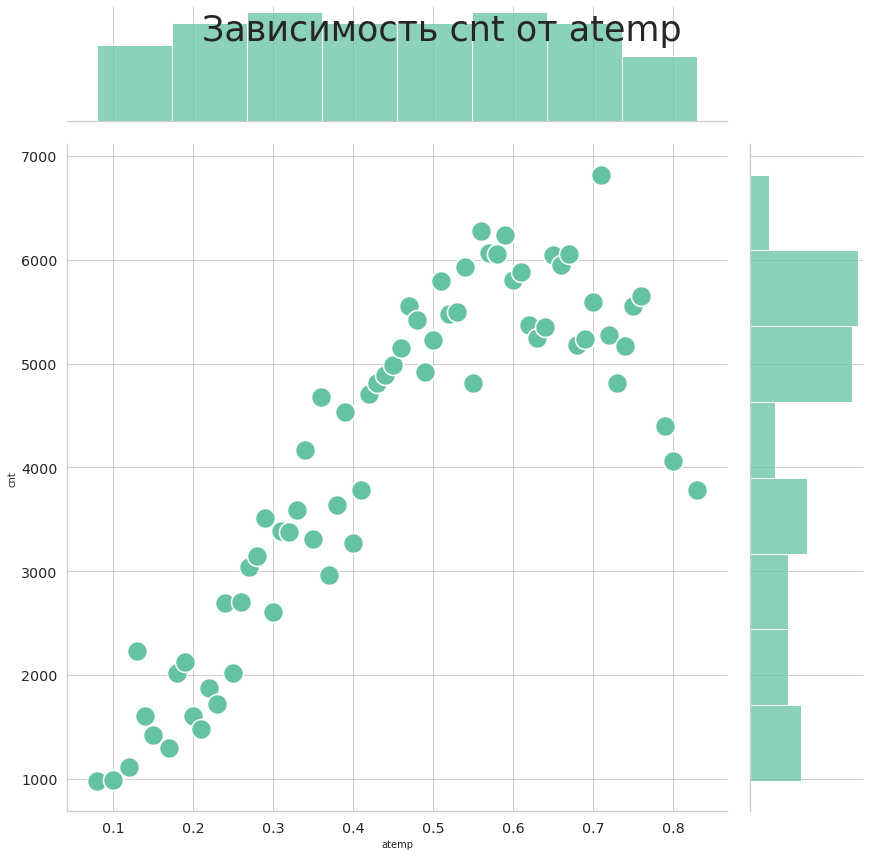

In [17]:
groupped_filter_jointplot('atemp', 'weathersit', [1, 2], precision = 2)

##### Краткие выводы: 
Параметр cnt (кол-во адресованных велосипедов)
- Растет с ростом температуры до некоторого момента, а дальше падает
- Можно сказать но характер графика до некоторого момента похож на линию

Зависимость от скорости ветра:

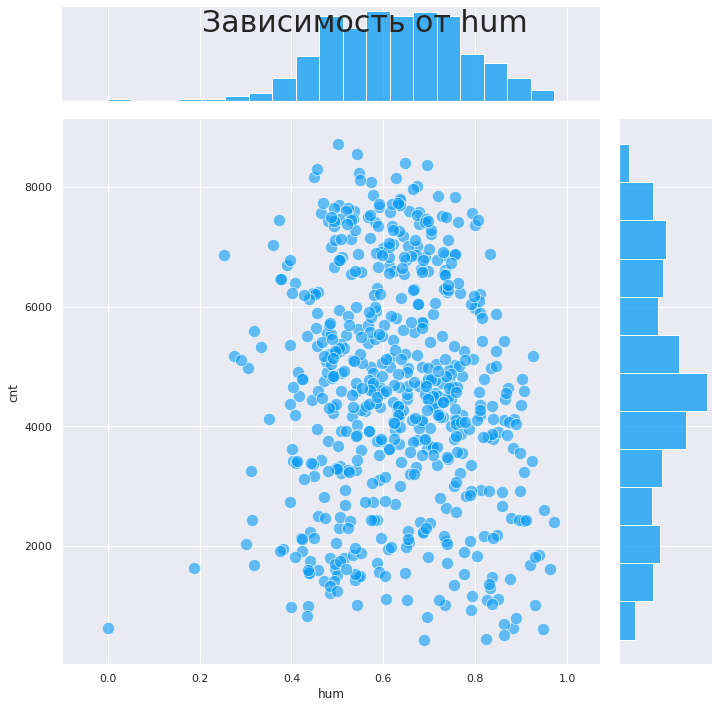

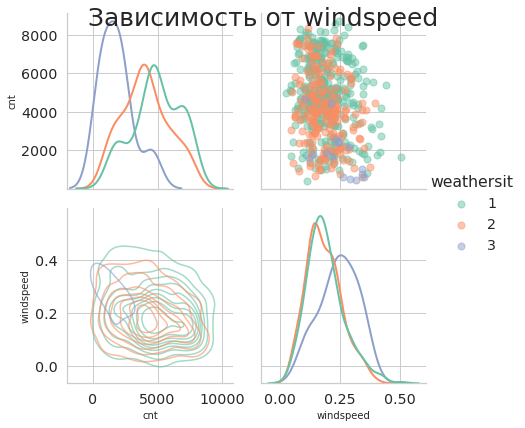

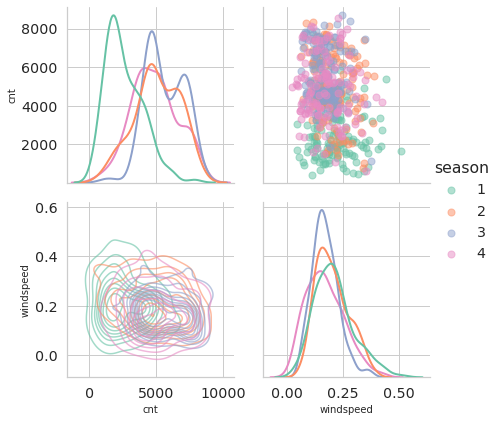

In [18]:
param_joint_plot('hum')
hue_plots('windspeed', ['weathersit', 'season'])

Рассмотрим зависимость среднюю cnt от скорости ветра без учета плохой погоды

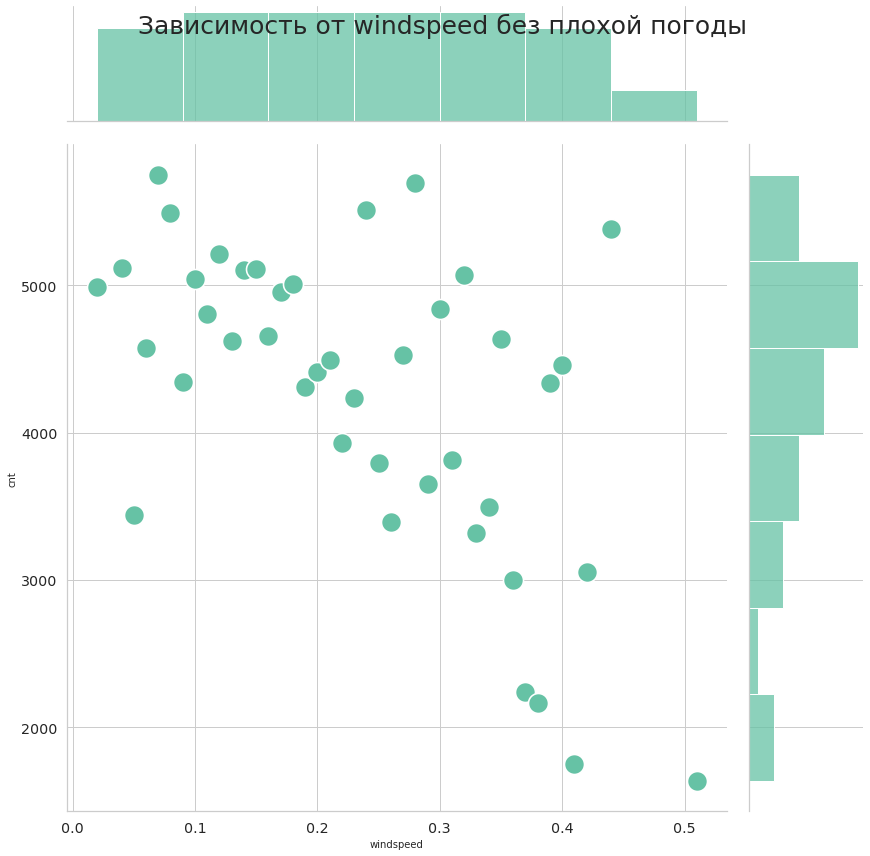

In [19]:
groupped_filter_jointplot('windspeed', 'weathersit', [1, 2])
plt.suptitle("Зависимость от windspeed без плохой погоды", fontsize = 25)
plt.show()

#### Краткий вывод из графика: 
- С ростом скорости ветра заметно(окололинейно) снижается cnt

Построим зависимость cnt от месяца и сезона

In [20]:
sns.set(style="darkgrid", font_scale=1.3, palette="Set2")


def draw_boxplot(param: str, name: str):
    ax = sns.boxplot(data=train, x=param, y="cnt", palette="Set3")
    ax.figure.set_size_inches(18.5, 10.5)
    ax.figure.suptitle(f"cnt в зависимости от {param}", fontsize=30)
    ax.set_xlabel(name, fontsize=30)
    ax.set_ylabel("cnt", fontsize=30)
    plt.show()

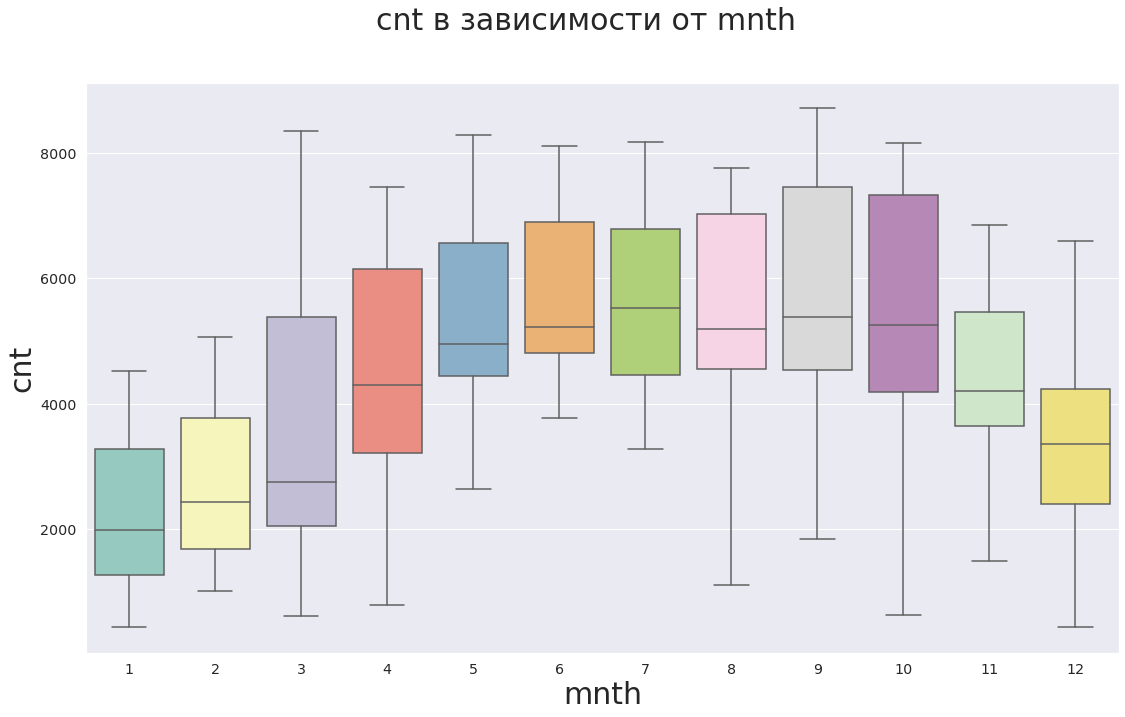

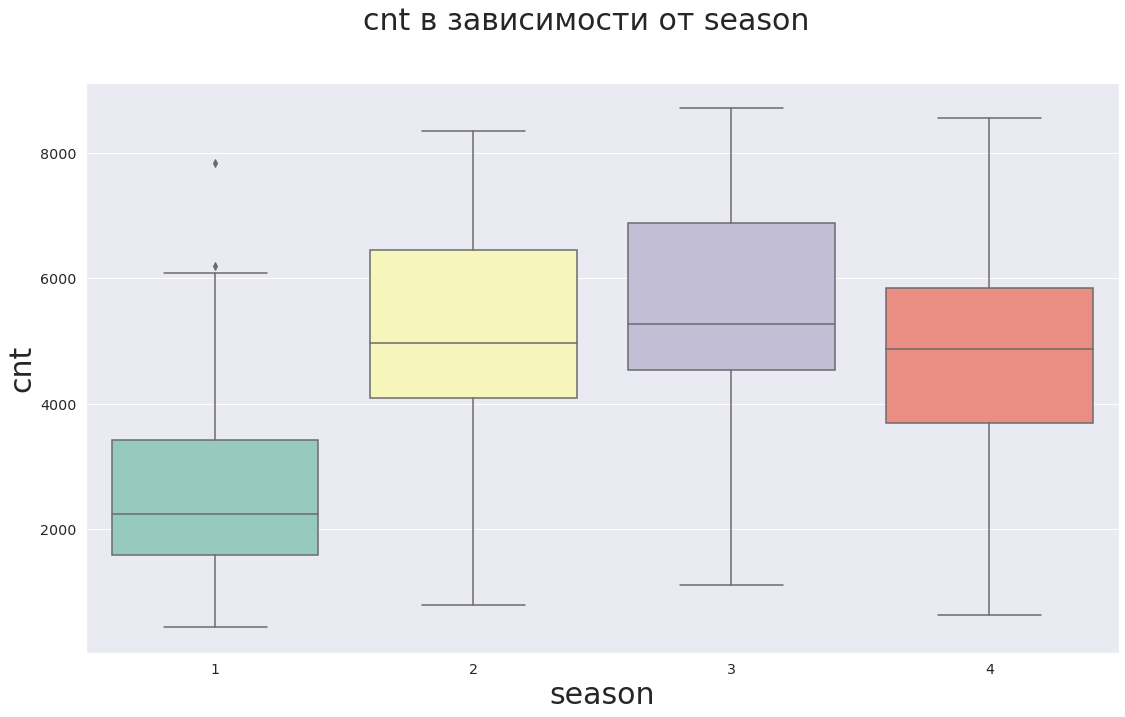

In [21]:
draw_boxplot('mnth', 'mnth')
print()
draw_boxplot('season', 'season')

##### Краткие выводы из графика:
- в 7 месяцы cnt выше чем в остальные
- от 1 го до 5 го месяца cnt растет  
- от 8 до 12 снижается
- зимой cnt меньше всего примерно в 2-2.5 раза  
- в остальные месяца cnt не сильно отличается, хотя летом cnt самый большой

##### Замечание:
- ясно что зависимость от сезона и месяца рассматривать странно тк скорее влияет температура и тп которые и меняются с сезоном

Посмотрим на зависимость от дня недели

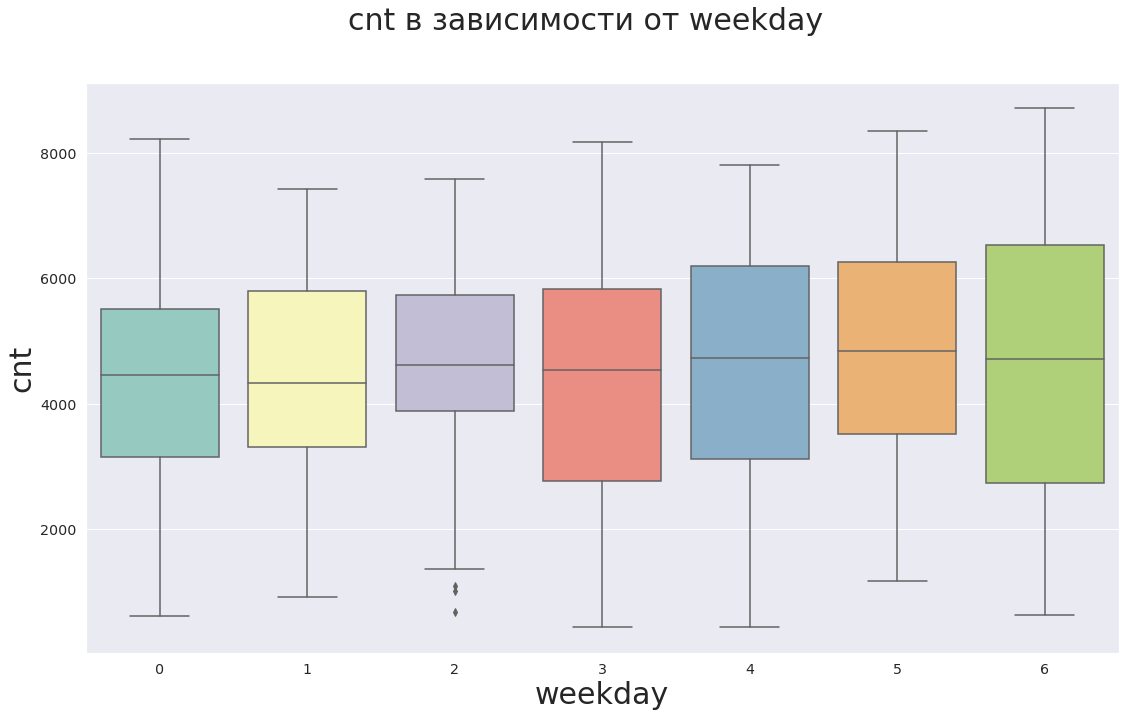

In [22]:
draw_boxplot('weekday', 'weekday')

##### Краткий вывод из графика:
- явной зависимости от дня недели нету

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

- Явно зависит cnt только от температуры и месяцы, который как видно из графиков в начале очевидно связан с температурой
- Кажется, что не имеет смысла строить графики в других масштабах: от температуры график хорошо выглядит на изначальном, а от месяца - мало делений по Ox
- выбросы есть можно видеть на большинстве графиков

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a).** обработка выбросов - удалим значения больше 0.95 квантиля и меньше 0.05 квантиля  
**б).** подготавливать данные не надо они уже в готовом виде (взял по ссылке выше)

Реализуйте данную процедуру.

In [23]:
q = 0.05
df = train
df = df[
    df['hum'].between(df['hum'].quantile(q), df['hum'].quantile(1-q)) &\
    df['atemp'].between(df['atemp'].quantile(q), df['atemp'].quantile(1-q)) &\
    df['windspeed'].between(df['windspeed'].quantile(q), df['windspeed'].quantile(1-q)) &\
    df['windspeed'].between(df['windspeed'].quantile(q), df['windspeed'].quantile(1-q)) 
]
train = df

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

Обучаем и кодируем:

In [24]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

Соеденим вещественные и категориальные признаки

In [25]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(420, 18)

Обучим модель линейной регрессии

In [26]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])

LinearRegression()

Коэффициенты:

In [27]:
print("Коэффициеты кроме свободного:\n " + str(model.coef_))
print("Свободный:\n " + str(model.intercept_))

Коэффициеты кроме свободного:
 [ 6.36631909e+03  1.41813408e+03 -2.80518484e+03 -4.16231281e+03
 -2.44300279e+01  6.65774033e+02  2.00007284e+02  1.81359595e+03
 -7.13554249e+02 -2.51208466e+02 -1.76099379e+02 -1.06301100e+02
  1.23336828e+02  6.22320600e+00  6.84539423e+02  3.09505338e+02
 -2.87069071e+02 -3.16958820e+02]
Свободный:
 2804.7863343329914


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

Удаляем выбросы:
    

In [28]:
q = 0.05
df = test
df = df[
    df['hum'].between(df['hum'].quantile(q), df['hum'].quantile(1-q)) &\
    df['atemp'].between(df['atemp'].quantile(q), df['atemp'].quantile(1-q)) &\
    df['windspeed'].between(df['windspeed'].quantile(q), df['windspeed'].quantile(1-q)) &\
    df['windspeed'].between(df['windspeed'].quantile(q), df['windspeed'].quantile(1-q)) 
]
test = df

In [29]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

Делаем предсказание по этой модели

In [30]:
test_preds = model.predict(X_test)

Метрики:

In [31]:
print("MSE:", round(metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5, 2))
print("MAE:", round(metrics.mean_absolute_error(test[target_feature], test_preds), 2))
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
print("MAPE:", str(round(mean_absolute_percentage_error(test[target_feature], test_preds), 2))+"%")

MSE: 1329.69
MAE: 1175.95
MAPE: 32.5%


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [32]:
def add_ones(array):
    return np.vstack((np.ones(len(array)), array.transpose())).transpose()

In [33]:
def extract_matr(df, need_ones = True):
    X = df.to_numpy()
    Y = X[:, -1]
    X = X[:, :-1]
    if (need_ones):
        X = add_ones(X)
    return X, Y

def extract_koefs(X, Y):
    return np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), Y))

def predict(X, teta):
    return np.matmul(X, teta)

In [34]:
X, Y = extract_matr(train)

In [35]:
teta = extract_koefs(X, Y)
print("Коэффициенты:\n", np.round(teta, 1))

Коэффициенты:
 [ 2882.8   602.3   -48.5 -1035.4   105.8  -104.5  -332.9  2440.7  3914.6
 -2405.5 -3474.4]


In [36]:
print("MAPE для тренировочной выборки:",str(round(mean_absolute_percentage_error(Y, predict(X, teta)), 2))+"%")

MAPE для тренировочной выборки: 27.43%


In [37]:
X, Y = extract_matr(test)
print("MAPE для тестовой выборки:",str(round(mean_absolute_percentage_error(Y, predict(X, teta)), 2))+"%")

MAPE для тестовой выборки: 33.13%


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

- Возможно влияет зависимость atemp от temp, не будем рассматривать temp в принципе.  
- weathersit тоже уберем тк некоторые другие параметры сильно от него зависят

In [38]:
new_categorial_features = ["season", "holiday", "weekday", "workingday"]
new_real_features = ["atemp", "hum", "windspeed", "mnth"]
target_feature = "cnt"
features = [*new_categorial_features, *new_real_features]
X, Y = extract_matr(train[[*features, target_feature]])
teta = extract_koefs(X, Y)
X, Y = extract_matr(test[[*features, target_feature]])
print("Коэффициенты:", np.round(teta, 1))
print(
    "MAPE для тестовой выборки:",
    str(round(mean_absolute_percentage_error(Y, predict(X, teta)), 2)) + "%",
)

Коэффициенты: [ 2777.1   586.3  -991.7   101.8   -98.5  6925.2 -3300.6 -3561.5   -40. ]
MAPE для тестовой выборки: 32.62%


Сделайте выводы.

**Выводы:**
- Убрать зависимые данные -  подняло MAPE только на долю процента, я бы скорее отнес это к погрешности и сказал, что это "исправление" было бесполезно

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

Обозначим $H(\theta) = \| Y - X\theta \|^2 + \lambda \|\theta\|^2$  
$H(\theta) = F(\theta) + \lambda\theta^T\theta$  
По формуле $\nabla(x^TAx) = 2Ax$   (для симметричной A)   
Имеем $\nabla(\theta^T\theta) = 2E\theta$  
Тогда $\nabla(H) = \nabla F + \nabla(\theta^T\theta) = 2(X^TX + \lambda E)\theta - 2X^TY$  
Градиент принимает нуль если и только если:  
$(X^TX + \lambda E)\theta = X^TY \Rightarrow \theta = (X^TX + \lambda E)^{-1}X^TY$  
Имеем $\rth = (X^TX + \lambda E)^{-1}X^TY$



Очевидно, что $det(X^TX + \lambda E) = 0 \Longleftrightarrow (-\lambda)$ - СЗ матрицы $X^TX$ значит, что вообще говоря скорее всего  $(X^TX + \lambda E)$ - обратима, а значит помогает решить эту проблему (Т.е. если нам не мешает даже то что $X^TX$ - близка к вырожденной)

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

Используя $x_{t+1} = x_t - \eta\nabla f(x_t)$ - стандартную формулу градиентного спуска 
GD: $\rth_{t+1} = \rth_t - \eta \nabla H(\rth_t) = \rth_t - \eta \nabla F(\rth_t) - \eta \nabla(\rth_t^T\rth_t) = \rth_t - \eta \sum\limits_{i=1}^{n}x_i({x_i}^T\rth_t - Y_i) - 2\eta\lambda\rth_t = (1-2\eta\lambda)\rth - \eta \sum\limits_{i=1}^{n}x_i({x_i}^T\rth_t - Y_i)$ (на 2 в коофициенте можно забить - уйдет в $\lambda$)  
SGD: $\rth_{t+1} = (1-\eta\lambda)\rth_t - \eta \frac{n}{k}\sum\limits_{i \in I}x_i(x_i^T \rth_t - Y_i)$,    $I = \{\xi_1, \xi_2, ..., \xi_k\}, \forall j$ $\xi_j \sim U\{1, 2, ..., n\}$, k - параметр, т.е. каждая координата $I$ выбирается случайно равновероятно среди n на каждой итерации

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

В формуле фигурирует $(1-\eta\lambda)$ - множитель перед $\rth_t$, который при больших или наоборот малых значения какой-либо координаты в $\rth_t$ может оказать существенное или наоборот слишком не существенное влияние по сравнению со вторым слагаемым.  
В это же время во втором слагаемом как в части из обычного МНК эта координата учтется в нужной пропорции в зависимости от $x_i$ и $Y_j$

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

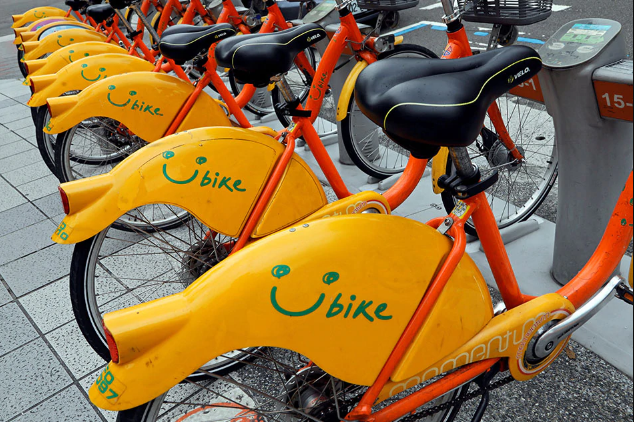

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [39]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        """
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        """

        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def fit(self, X, Y):
        """
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        """

        # Посчитайте оценки коэффициентов и, возможно,
        # еще что-то, что пригодится в predict.
        X_ = add_ones(X.copy())
        form = np.matmul(X_.transpose(), X_)
        self.koefs = np.matmul(
            np.linalg.inv(form + self.lambd * np.eye(len(form))),
            np.matmul(X_.transpose(), Y),
        )
        return self

    def predict(self, X):
        X_ = add_ones(X.copy())
        """
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        """
        # Посчитайте предсказания
        predictions = np.matmul(X_, self.koefs)

        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [40]:
def clean_from_emis(df):
    return df[
            df['hum'].between(df['hum'].quantile(q), df['hum'].quantile(1-q)) &\
            df['atemp'].between(df['atemp'].quantile(q), df['atemp'].quantile(1-q)) &\
            df['windspeed'].between(df['windspeed'].quantile(q), df['windspeed'].quantile(1-q)) &\
            df['temp'].between(df['temp'].quantile(q), df['temp'].quantile(1-q)) 
        ] 

In [41]:
data_ = data.copy()
train_, other_ = train_test_split(data_, test_size=2 / 5, shuffle=True)
valid_, test_ = train_test_split(other_, test_size=1 / 2, shuffle=True)
train_ = clean_from_emis(train_)
valid_ = clean_from_emis(valid_)
test_ = clean_from_emis(test_)
X_train, Y_train = extract_matr(train_, need_ones=False)
X_valid, Y_valid = extract_matr(valid_, need_ones=False)
X_test, Y_test = extract_matr(test_, need_ones=False)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [42]:
def standart_scaler(X):
    return (X - np.mean(X, axis = 0))/np.sqrt(np.var(X, axis = 0))
def MinMax_scaler(X):
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) - np.min(X, axis = 0))

In [43]:
#X_train = MinMax_scaler(X_train)
#X_valid = MinMax_scaler(X_valid)
#X_test = MinMax_scaler(X_test)
X_train = standart_scaler(X_train)
X_valid = standart_scaler(X_valid)
X_test = standart_scaler(X_test)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [44]:
models_count = 1000
lambds = np.logspace(start = -8, stop = 30, num = models_count, base = 1/2, endpoint = True)

In [45]:
models = [RidgeRegression(lambd=lambd) for lambd in lambds]
for model in models:
    model.fit(X_train, Y_train)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [46]:
train_predictions = np.array([model.predict(X_train) for model in models])
valid_predictions = np.array([model.predict(X_valid) for model in models])

train_MSE = np.array(
    [
        metrics.mean_squared_error(Y_train, prediction) ** 0.5
        for prediction in train_predictions
    ]
)

train_MAE = np.array(
    [
        metrics.mean_absolute_error(Y_train, prediction)
        for prediction in train_predictions
    ]
)

train_MAPE = np.array(
    [
        mean_absolute_percentage_error(Y_train, prediction)
        for prediction in train_predictions
    ]
)

valid_MSE = np.array(
    [
        metrics.mean_squared_error(Y_valid, prediction) ** 0.5
        for prediction in valid_predictions
    ]
)

valid_MAE = np.array(
    [
        metrics.mean_absolute_error(Y_valid, prediction)
        for prediction in valid_predictions
    ]
)

valid_MAPE = np.array(
    [
        mean_absolute_percentage_error(Y_valid, prediction)
        for prediction in valid_predictions
    ]
)


Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

Построим эти графики и иногда для наглядности в logscale

In [47]:
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

In [48]:
def metrics_plot(
    lambds: np.ndarray,
    train_values,
    valid_values,
    name: str,
    logscale_flags=[False, False],
):
    fig = plt.figure(figsize=(12, 12))
    x = lambds
    y1 = train_values
    y2 = valid_values
    ax1 = sns.lineplot(x=x, y=y1, c="blue", label="train", legend="full")
    ax2 = sns.lineplot(x=x, y=y2, c="red", label="valid", legend="full")
    plt.title(f"{name} в зависимости от lambda", fontsize=25)
    if logscale_flags[0]:
        ax1.set_xscale("log")
        ax2.set_xscale("log")
        plt.xlabel("lambda (logscale)", fontsize=18)
    else:
        plt.xlabel("lambda", fontsize=18)
    if logscale_flags[1]:
        plt.ylabel(f"{name} (logscale)", fontsize=18)
        ax1.set_yscale("log")
        ax1.set_yscale("log")
    else:
        plt.ylabel(f"{name}", fontsize=18)

    plt.legend(fontsize=20)
    plt.show()

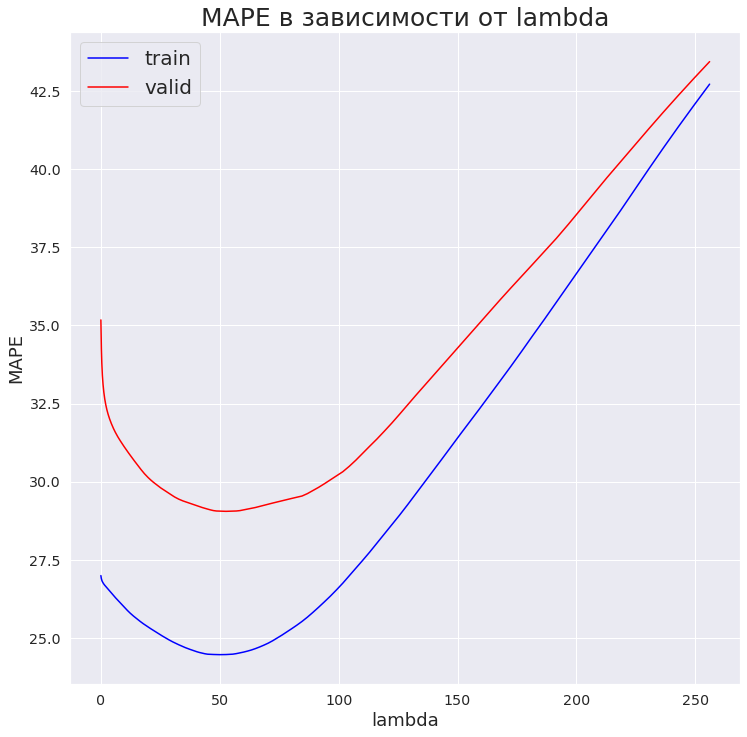

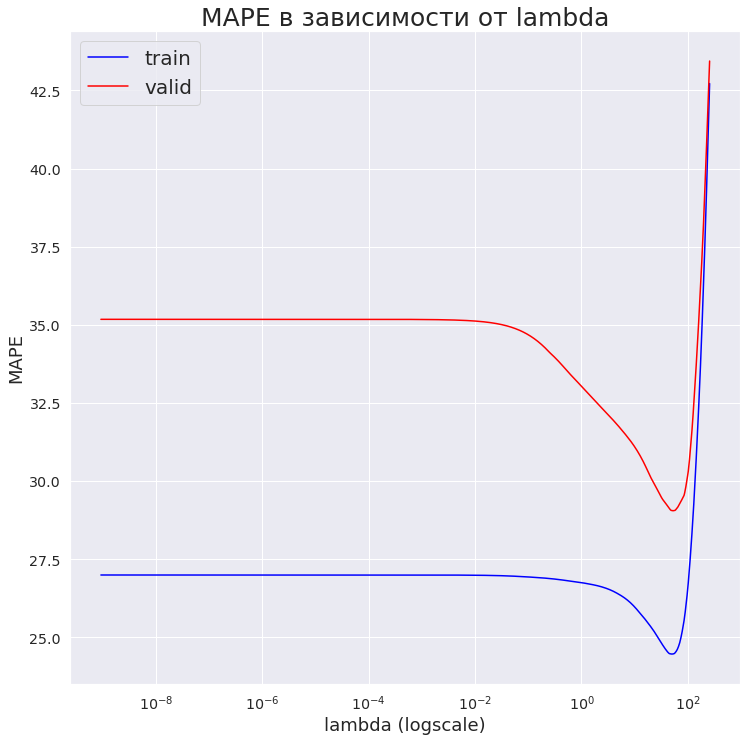

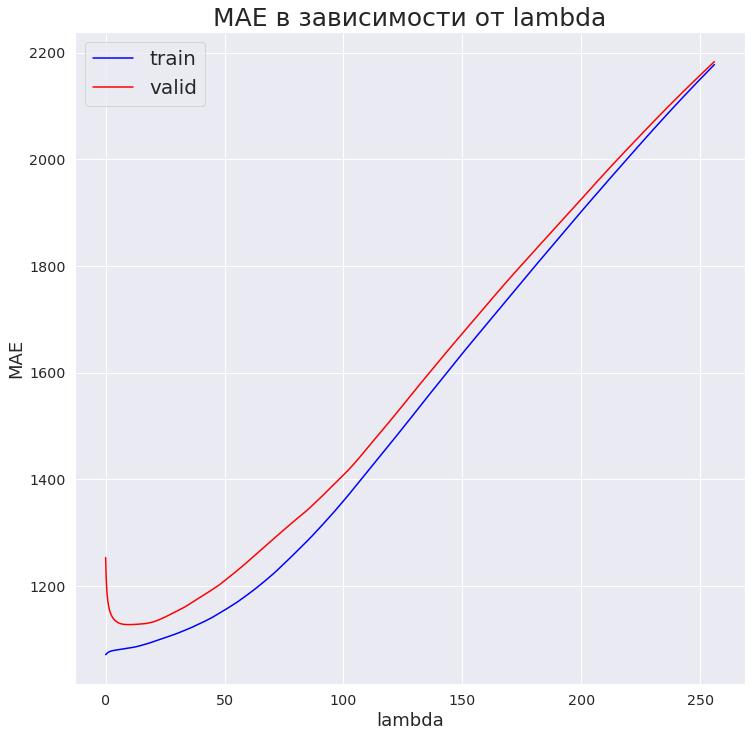

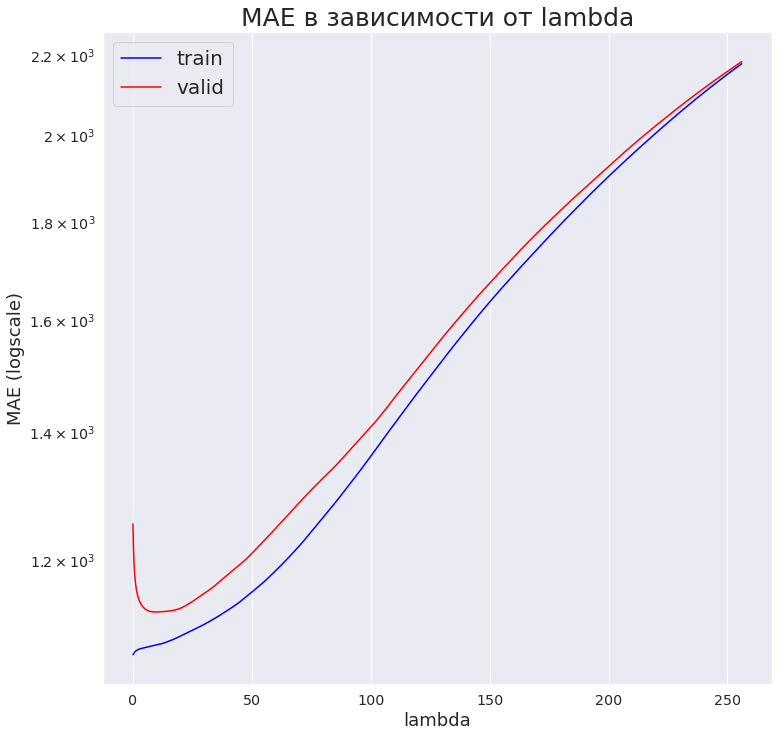

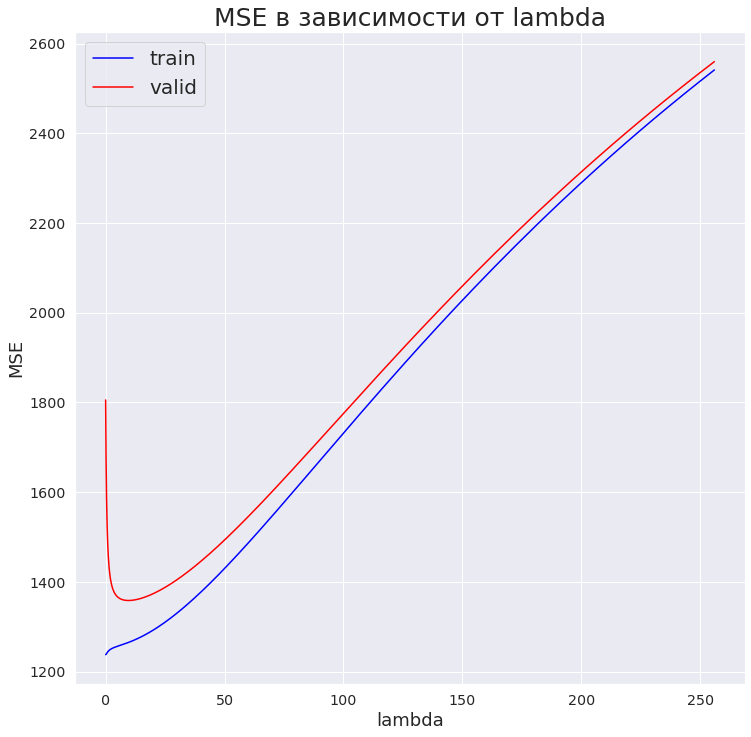

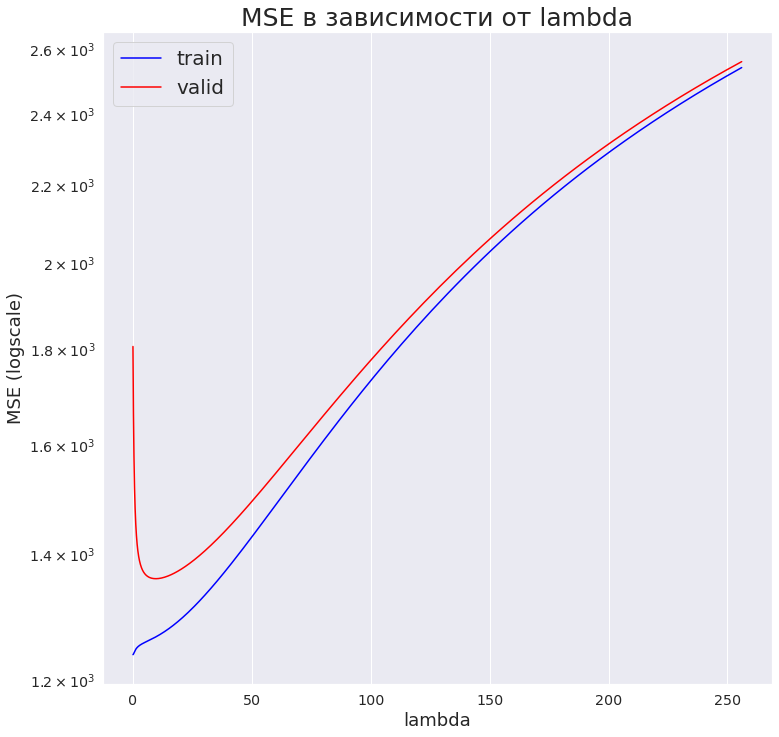

In [49]:
metrics_plot(lambds, train_MAPE, valid_MAPE, "MAPE")
metrics_plot(lambds, train_MAPE, valid_MAPE, "MAPE", [True, False])
metrics_plot(lambds, train_MAE, valid_MAE, "MAE")
metrics_plot(lambds, train_MAE, valid_MAE, "MAE", [False, True])
metrics_plot(lambds, train_MSE, valid_MSE, "MSE")
metrics_plot(lambds, train_MSE, valid_MSE, "MSE", [False, True])

##### Краткие выводы:
- valid на MAPE показался хуже, а на остальных - лучше, чем train
- характеры этих графиков(для valid и для train) очень похожи  
- экстремум на графике MAPE можно четко наблюдать и у train и valid они не очень далеко  
- виден резкий спад MAPE на logscale что значит что действительно подбор lambd нашел нужное место  


Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

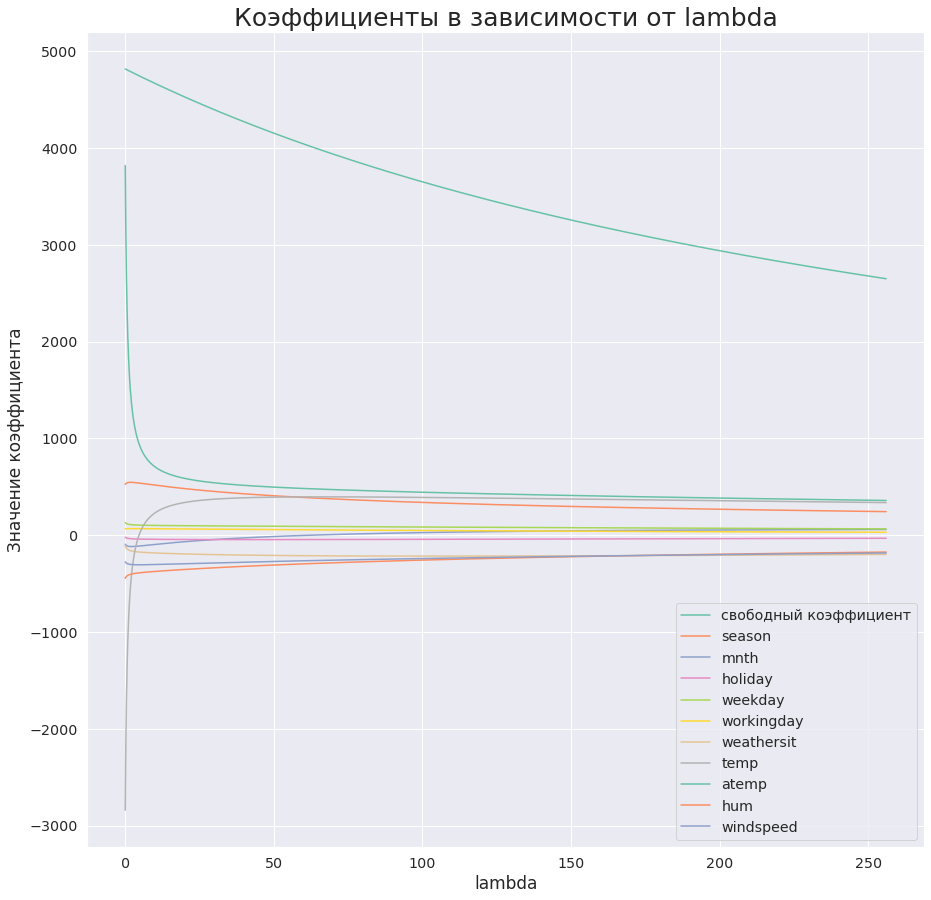

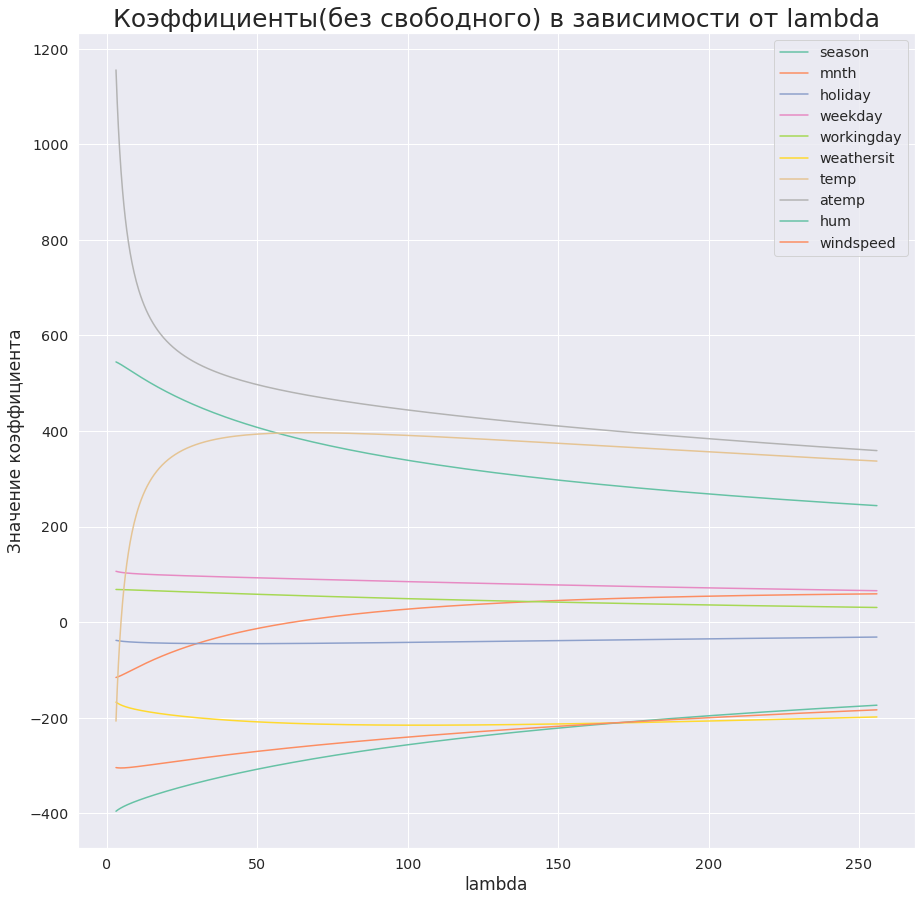

In [50]:
koefs = np.array([model.koefs for model in models])
koefs.shape
fig = plt.figure(figsize=(15, 15))
value_names = ["свободный коэффициент", *data.columns]
start = 0
counter = start
for values in koefs.transpose():
    sns.lineplot(x=lambds, y=values, label=value_names[counter])
    counter += 1
plt.title("Коэффициенты в зависимости от lambda", fontsize=25)
plt.xlabel("lambda", fontsize=17)
plt.ylabel("Значение коэффициента", fontsize=17)
plt.show()


koefs = np.array([model.koefs for model in models])
koefs.shape
fig = plt.figure(figsize=(15, 15))
value_names = ["свободный коэффициент", *data.columns]
start = 1
counter = start
for values in koefs.transpose()[1:]:
    ax = sns.lineplot(x=lambds[:-830], y=values[:-830], label=value_names[counter])
    counter += 1
plt.title("Коэффициенты(без свободного) в зависимости от lambda", fontsize=25)
plt.xlabel("lambda", fontsize=17)
plt.ylabel("Значение коэффициента", fontsize=17)
plt.show()

##### Краткие выводы из графиков:
- Свободный коэффициент заметно болше по сравнению с остальными, что значит, что все значения cnt достаточно большие, а все остальные параметры смещают его в ту или иную сторону  
- параметры на втором графике достаточно сильно колеблются в первой сотне что может значить что модель действительно подстраивается при подборе lambd с учетом что оптимальная недалеко от 50
- Можно видеть, что скорее всего cnt не зависит от дня недели(по крайней мере не зависит так что Bridge-регрессия может ее выявить), а от остальных параметров влияние есть

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [51]:
print(
    "Оптимальное значение lambd по параметру MAPE:",
    np.round(lambds[np.argmin(valid_MAPE)], 1),
)
print(
    "Оптимальное значение lambd по параметру MAE:",
    np.round(lambds[np.argmin(valid_MAE)], 1),
)
print(
    "Оптимальное значение lambd по параметру MSE:",
    np.round(lambds[np.argmin(valid_MSE)], 1),
)


Оптимальное значение lambd по параметру MAPE: 52.6
Оптимальное значение lambd по параметру MAE: 10.0
Оптимальное значение lambd по параметру MSE: 9.7


Сделайте выводы.

1) Подбор гиперпараметра в данной задаче сильно зависел от используемой метрики  
2) lambda сильно влияет на точность что можно видеть на графике MAPE  
3) Bridge - регрессия показывает себя лучше, чем МНК

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

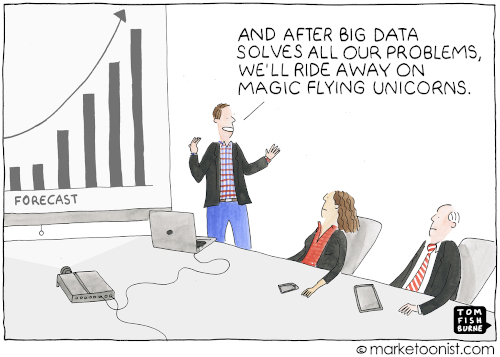

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [52]:
teta0 = np.ones(len(data.columns))

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Напишем функцию получения следующей teta из предыдущей

In [53]:
lambd = 61
eta = 0.0001


def next_iter(X: np.ndarray, Y: np.ndarray, teta: np.ndarray, k):
    idxs = np.random.randint(0, len(X), k)
    return (1 - eta * lambd) * teta - eta * (len(X) / k) * np.matmul(
        X[idxs].transpose(), (np.matmul(X[idxs], teta) - Y[idxs])
    )

N - число итерация  
k - парметр  
tetaes[i] - коэффициент на i-й итерации

In [54]:
k = 16
N = 1000
tetaes = [teta0]
X_train_ = add_ones(X_train)
X_valid_ = add_ones(X_valid)
X_test_ = add_ones(X_test)
for i in range(1, N):
    tetaes.append(next_iter(X_train_, Y_train, tetaes[i - 1], k))
tetaes = np.array(tetaes)

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [55]:
teta = tetaes[i]

Функции считают ошибку итеративно(на вход поступает матрица  
\begin{pmatrix}
| & | & & | \\
\hat{Y_1} & \hat{Y_2} & ... & \hat{Y_N}\\
| & | & & | \\
\end{pmatrix}  
Где $\hat{Y_i}$ - предсказание на i-й итерации)  
И вторым аргументом y_true - истиное значение параметров  
return: np.ndarray - на i-й координате посчитаная метрика для $Y_i$ и $y\_true$

In [56]:
def mean_squared_error(predictions: np.ndarray, y_true):
    y_true_ = y_true.reshape(len(y_true), 1)
    return np.sqrt(((predictions - y_true_) * (predictions - y_true_)).mean(axis=0))


def mean_absolute_error(predictions: np.ndarray, y_true):
    y_true_ = y_true.reshape(len(y_true), 1)
    return np.abs(predictions - y_true_).mean(axis=0)


def mean_absolute_percentage_error_(predictions: np.ndarray, y_true):
    y_true_ = y_true.reshape(len(y_true), 1)
    return 100 * (np.abs(predictions - y_true_) / y_true_).mean(axis=0)

Эта функция принимает X и массив из teta и выдает $\hat{Y}$ - для каждой координаты

In [57]:
def count_iter_predictions(X, koefs):
    return np.matmul(X, koefs.transpose())

Считаем предсказания по итерациям

iter_predictions_... - матрица n*N, где i-й столбец - prediction для X на i-й итерации

In [58]:
iter_predictions_train = count_iter_predictions(X_train_, tetaes)
iter_predictions_valid = count_iter_predictions(X_valid_, tetaes)

Функция рисует график(несколько на одном) по заданным предсказаниям, истинным значениям и метрике (итерационные))
Также может рисовать начиная не со старта и делать логарифмический масштаб

In [59]:
def iter_metric_plot(
    iter_predictions_list: list,
    Y_true_list: list,
    labels: list,
    metric,
    start=0,
    y_log_flag=False,
):
    fig = plt.figure(figsize=(17, 12))
    x = np.linspace(0, N, N, dtype=int)[start:]
    for i, iter_predictions in enumerate(iter_predictions_list):
        y = metric(iter_predictions_list[i], Y_true_list[i])[start:]
        ax = sns.lineplot(x=x, y=y, label=labels[i])
        if y_log_flag:
            ax.set_yscale("log")
    if y_log_flag:
        plt.ylabel("Значение метрики (logscale)", fontsize=18)
    else:
        plt.ylabel("Значение метрики", fontsize=18)
    plt.legend(fontsize=20)
    plt.xlabel("номер итерации", fontsize=18)

MAPE на обучающей и валидационной выбоках:

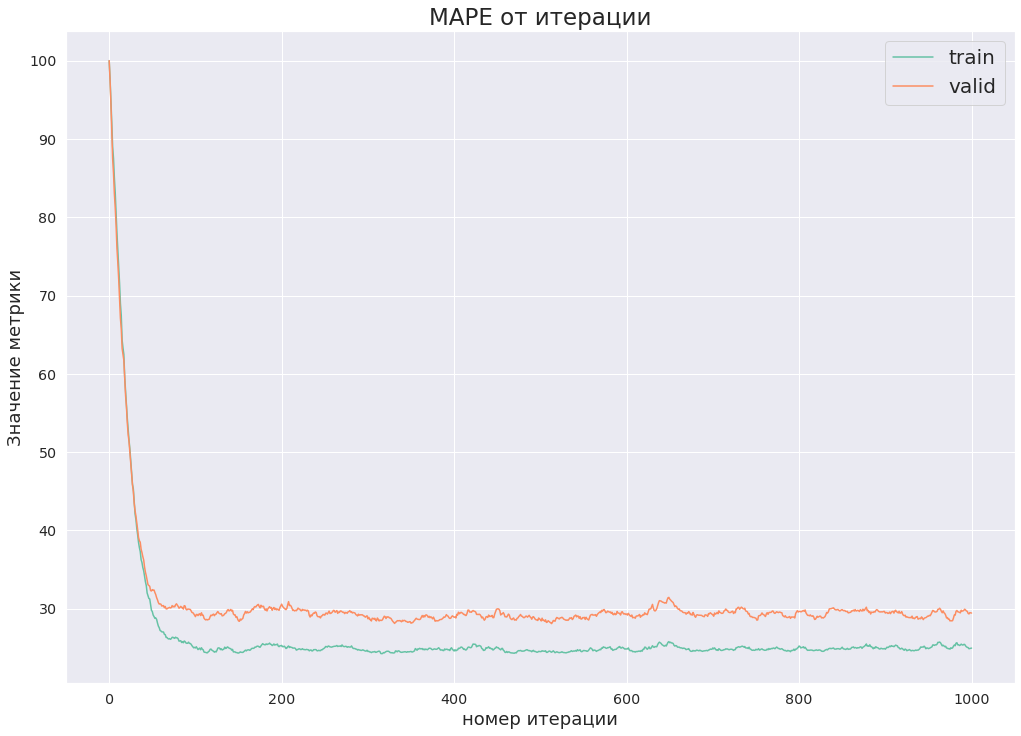

In [60]:
iter_metric_plot(
    (iter_predictions_train, iter_predictions_valid),
    (Y_train, Y_valid),
    ("train", "valid"),
    mean_absolute_percentage_error_,
    start=0,
    y_log_flag=False,
)
plt.title("MAPE от итерации", fontsize=23)
plt.show()

Тот же графики но начнем с 100:

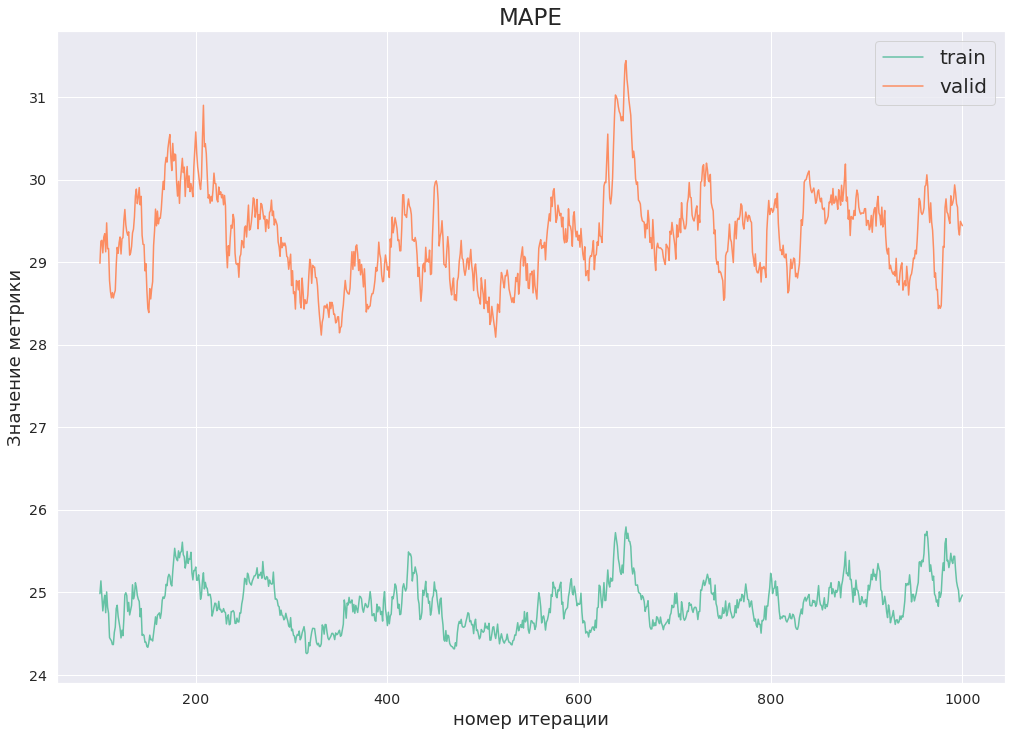

In [61]:
iter_metric_plot(
    (iter_predictions_train, iter_predictions_valid),
    (Y_train, Y_valid),
    ("train", "valid"),
    mean_absolute_percentage_error_,
    start=100,
    y_log_flag=False,
)
plt.title("MAPE", fontsize=23)
plt.show()

Построи теперь то же самое для MAE

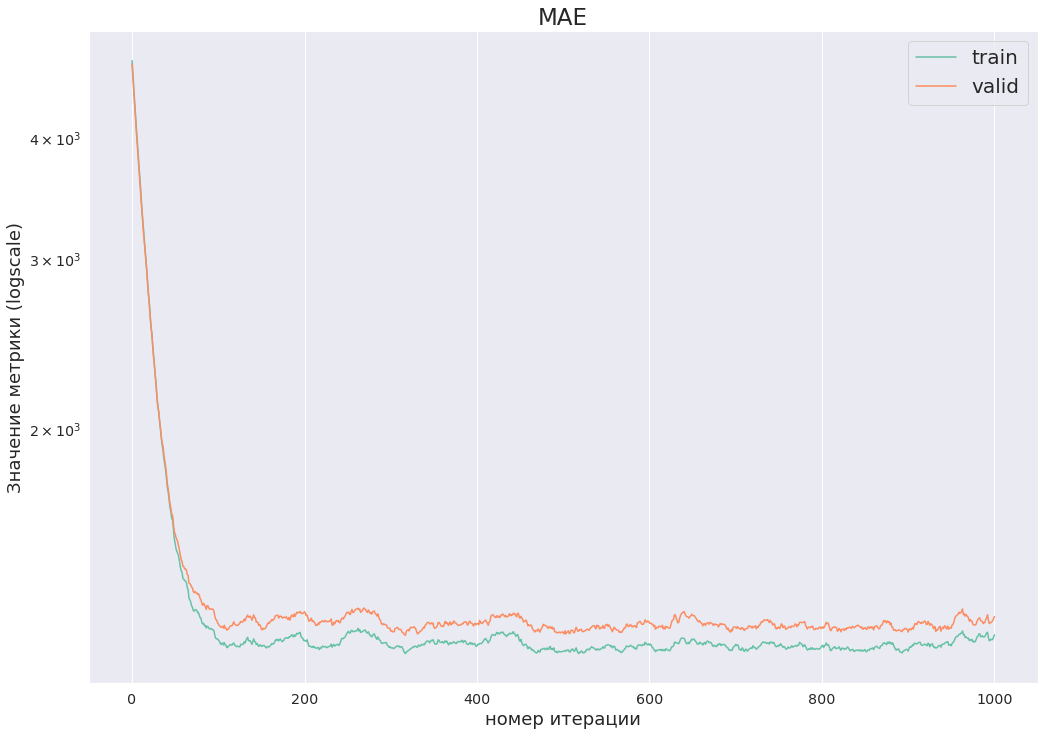

In [62]:
iter_metric_plot(
    (iter_predictions_train, iter_predictions_valid),
    (Y_train, Y_valid),
    ("train", "valid"),
    mean_absolute_error,
    start=0,
    y_log_flag=True,
)
plt.title("MAE", fontsize=23)
plt.show()

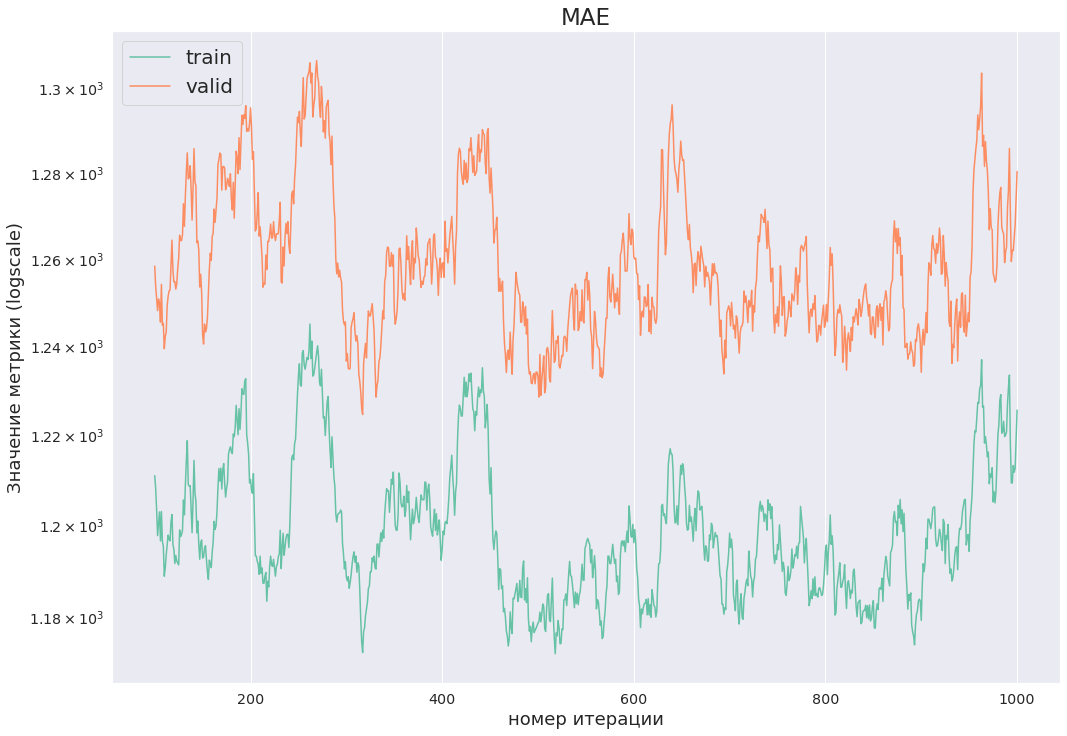

In [63]:
iter_metric_plot(
    (iter_predictions_train, iter_predictions_valid),
    (Y_train, Y_valid),
    ("train", "valid"),
    mean_absolute_error,
    start=100,
    y_log_flag=True,
)
plt.title("MAE", fontsize=23)
plt.show()

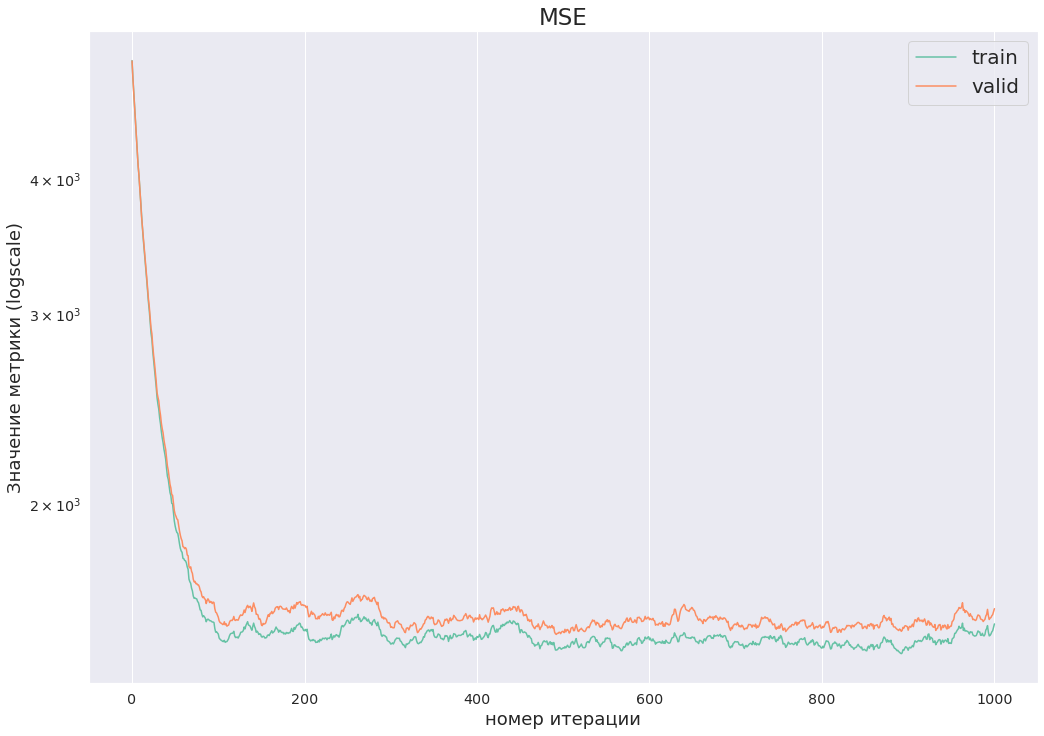

In [64]:
iter_metric_plot(
    (iter_predictions_train, iter_predictions_valid),
    (Y_train, Y_valid),
    ("train", "valid"),
    mean_squared_error,
    start=0,
    y_log_flag=True,
)
plt.title("MSE", fontsize=23)
plt.show()

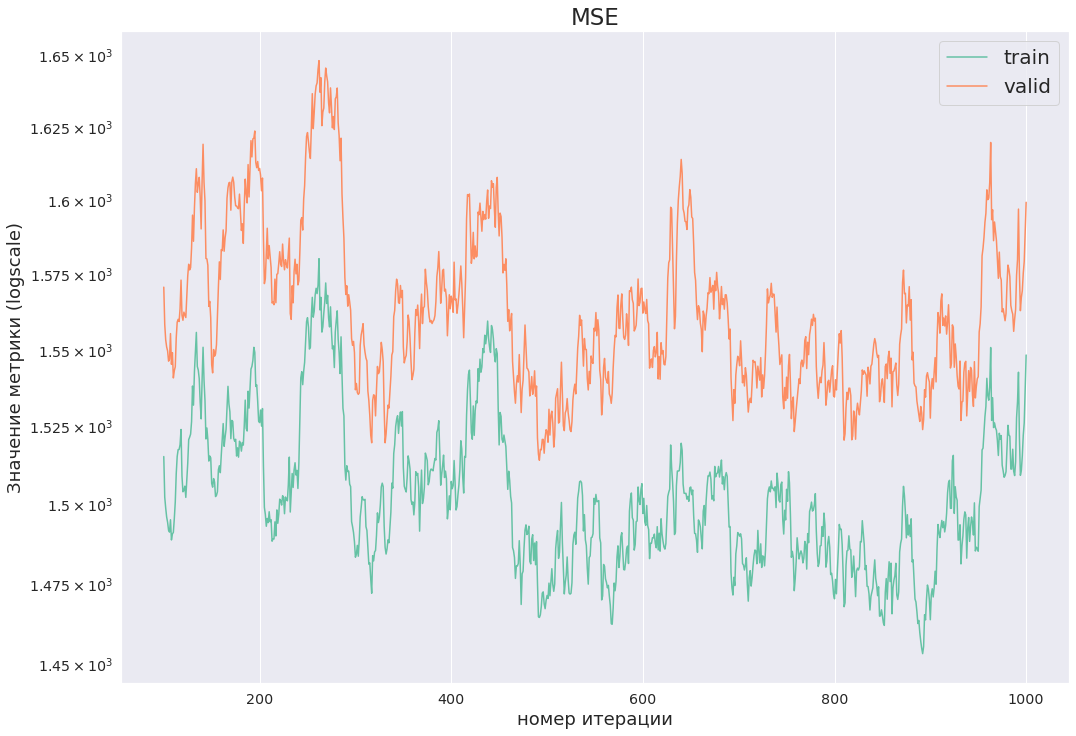

In [65]:
iter_metric_plot(
    (iter_predictions_train, iter_predictions_valid),
    (Y_train, Y_valid),
    ("train", "valid"),
    mean_squared_error,
    start=100,
    y_log_flag=True,
)
plt.title("MSE", fontsize=23)
plt.show()

#### Выводы из графиков:
- Характеры всех трех метрик примерно одинаковые - сначала резкий спад а потом колебания около одного значения
- На valid и на train результаты метрик довольно близкие почти на всехх и сложно сказать что и как чучше оценивает
- MAE и MSE - очень похожие метрики  


Посчитайте ошибку на тестовой выборке.

выберем такой номер итерации, при которой ошибка на valid минимальна:

In [66]:
idx = np.argmin(
    mean_absolute_percentage_error_(iter_predictions_valid, Y_valid)
)  # номер итерации, где MAPE у valid минимальна
print(
    "MAPE на тестовом наборе:",
    np.round(
        mean_absolute_percentage_error(Y_test, np.matmul(X_test_, tetaes[idx])), 1
    ),
)  # в моей функции и авторской с лекции разный порядок аргументов

idx = np.argmin(
    mean_absolute_percentage_error_(iter_predictions_valid, Y_valid)
)
print(
    "MAE на тестовом наборе:",
    np.round(metrics.mean_absolute_error(Y_test, np.matmul(X_test_, tetaes[idx])), 1),
)

idx = np.argmin(
    mean_absolute_percentage_error_(iter_predictions_valid, Y_valid)
)
print(
    "MSE на тестовом наборе:",
    np.round(
        np.sqrt(metrics.mean_squared_error(Y_test, np.matmul(X_test_, tetaes[idx]))), 1
    ),
)


MAPE на тестовом наборе: 22.0
MAE на тестовом наборе: 1105.8
MSE на тестовом наборе: 1455.9


Сделайте выводы.

- Гребневая регрессия на стохастическом спуске показывает себя лучше, чем дефолтный МНК
- $\theta_t$ достаточно быстро приходит к "равновесию"
- Метрики ошибок все показзывают то что начиная с какого то момента принимает устойчивое положение